In [1]:
import pandas as pd

In [2]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [22]:
import dagstermill
from dagster import AssetMaterialization

In [3]:
#loyautes = pd.read_csv('out/loyautes.csv', index_col='acteurRef')

In [4]:
organes = pd.read_csv('out/organes.csv')
acteurs = pd.read_csv('out/acteurs.csv')
votes = (pd.read_csv('out/votes.csv'))

In [5]:
X = (
    votes
    .assign(
        position = lambda df: df.position.replace({'contre': -1, 'pour': 1, 'abstention': 0 })
    )
    .pivot_table(
        index='acteurRef',
        columns='scrutin',
        values='position'
    )
    .fillna(0)
)

X

scrutin,VTANR5L16V1,VTANR5L16V10,VTANR5L16V100,VTANR5L16V1000,VTANR5L16V1001,VTANR5L16V1002,VTANR5L16V1003,VTANR5L16V1004,VTANR5L16V1005,VTANR5L16V1006,...,VTANR5L16V990,VTANR5L16V991,VTANR5L16V992,VTANR5L16V993,VTANR5L16V994,VTANR5L16V995,VTANR5L16V996,VTANR5L16V997,VTANR5L16V998,VTANR5L16V999
acteurRef,,,,,,,,,,,,,,,,,,,,,
PA1008,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PA1206,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA1327,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA1567,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA1592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA805166,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
PA817203,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
PA817211,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
pca = PCA(n_components=2)
X_r = pca.fit(X.values).transform(X.values)

In [7]:
pca.explained_variance_ratio_

array([0.34225795, 0.10038027])

In [8]:
len(X_r)

581

In [9]:
scrutins_vecteur = (
    X.reset_index()
    .join(votes.drop_duplicates(subset='acteurRef').set_index('acteurRef'), on='acteurRef')
    .join(organes.set_index('uid'), on='organe')
    .set_index('acteurRef')
)

scrutins_vecteur

,VTANR5L16V1,VTANR5L16V10,VTANR5L16V100,VTANR5L16V1000,VTANR5L16V1001,VTANR5L16V1002,VTANR5L16V1003,VTANR5L16V1004,VTANR5L16V1005,VTANR5L16V1006,...,regime,legislature,regimeJuridique,siteInternet,nombreReunionsAnnuelles,secretariat,listePays,positionPolitique,preseance,couleurAssociee
acteurRef,,,,,,,,,,,,,,,,,,,,,
PA1008,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,6.0,#DF84B5
PA1206,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,99.0,#8D949A
PA1327,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,4.0,#4565AD
PA1567,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,6.0,#DF84B5
PA1592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,99.0,#8D949A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA805166,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Minoritaire,5.0,#CE5215
PA817203,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Majoritaire,1.0,#61468F
PA817211,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313


In [10]:
mapping = (
    pd
    .DataFrame(X_r, columns=["axe 1", "axe 2"])
    .join(
        X.reset_index()
        .join(votes.drop_duplicates(subset='acteurRef').set_index('acteurRef'), on='acteurRef')
        .join(organes.set_index('uid'), on='organe')
    )
    .set_index('acteurRef')
)

mapping

,axe 1,axe 2,VTANR5L16V1,VTANR5L16V10,VTANR5L16V100,VTANR5L16V1000,VTANR5L16V1001,VTANR5L16V1002,VTANR5L16V1003,VTANR5L16V1004,...,regime,legislature,regimeJuridique,siteInternet,nombreReunionsAnnuelles,secretariat,listePays,positionPolitique,preseance,couleurAssociee
acteurRef,,,,,,,,,,,,,,,,,,,,,
PA1008,-15.750636,-6.356835,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,6.0,#DF84B5
PA1206,-6.439633,1.391369,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,99.0,#8D949A
PA1327,4.607919,3.623694,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,4.0,#4565AD
PA1567,-12.969329,-5.880126,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,6.0,#DF84B5
PA1592,0.488657,1.149012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,99.0,#8D949A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA805166,9.002075,-0.260314,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Minoritaire,5.0,#CE5215
PA817203,5.749284,1.522692,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Majoritaire,1.0,#61468F
PA817211,-13.226591,-6.416880,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313


In [11]:
acteurs_pca = (
    mapping
    [['axe 1','axe 2', 'organe']]
    .join(acteurs.set_index('uid'))
    .join(organes.set_index('uid')[['libelleAbrev', 'couleurAssociee']], on='organe')
)

acteurs_pca

,axe 1,axe 2,organe,nom,prenom,civ,libelleAbrev,couleurAssociee
acteurRef,,,,,,,,
PA1008,-15.750636,-6.356835,PO800496,David,Alain,M.,SOC,#DF84B5
PA1206,-6.439633,1.391369,PO793087,Dupont-Aignan,Nicolas,M.,NI,#8D949A
PA1327,4.607919,3.623694,PO800508,Forissier,Nicolas,M.,LR,#4565AD
PA1567,-12.969329,-5.880126,PO800496,Guedj,Jérôme,M.,SOC,#DF84B5
PA1592,0.488657,1.149012,PO793087,Habib,David,M.,NI,#8D949A
...,...,...,...,...,...,...,...,...
PA805166,9.002075,-0.260314,PO800484,Bergantz,Anne,Mme,DEM,#CE5215
PA817203,5.749284,1.522692,PO800538,Miller,Laure,Mme,RE,#61468F
PA817211,-13.226591,-6.416880,PO800490,Pilato,René,M.,LFI-NUPES,#E42313


In [12]:
acteurs_pca.to_csv('out/deputes_pca.csv')

In [13]:
axe = (
    mapping
    [['axe 1','axe 2', 'organe']]
    .groupby('organe')
    .median()
    .sort_values('axe 2')
)

(
    axe
    .join(organes.set_index('uid'))
    .set_index('libelle')
)

,axe 1,axe 2,@xmlns,@xmlns:xsi,@xsi:type,codeType,libelleEdition,libelleAbrege,libelleAbrev,viMoDe,...,regime,legislature,regimeJuridique,siteInternet,nombreReunionsAnnuelles,secretariat,listePays,positionPolitique,preseance,couleurAssociee
libelle,,,,,,,,,,,,,,,,,,,,,
Écologiste - NUPES,-15.940413,-9.220727,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Écologiste - NUPES,Ecolo - NUPES,ECOLO,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,8.0,#77AA79
La France insoumise - Nouvelle Union Populaire écologique et sociale,-18.870966,-8.625866,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe La France insoumise - Nouvelle Union...,LFI - NUPES,LFI-NUPES,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313
Socialistes et apparentés (membre de l’intergroupe NUPES),-12.208452,-5.517531,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Socialistes et apparentés (membre de...,SOC,SOC,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,6.0,#DF84B5
Gauche démocrate et républicaine - NUPES,-11.280576,-3.909381,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe de la Gauche démocrate et républicai...,GDR - NUPES,GDR-NUPES,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,9.0,#991414
Démocrate (MoDem et Indépendants),12.184351,-1.573154,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Démocrate (MoDem et Indépendants),Dem,DEM,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Minoritaire,5.0,#CE5215
Renaissance,14.130518,-1.349316,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Renaissance,RE,RE,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Majoritaire,1.0,#61468F
Horizons et apparentés,11.375504,-1.042384,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Horizons et apparentés,HOR,HOR,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Minoritaire,7.0,#32B3CA
"Libertés, Indépendants, Outre-mer et Territoires",-5.112847,-0.817343,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,"du groupe Libertés, Indépendants, Outre-mer et...",LIOT,LIOT,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,10.0,#F8D434
Non inscrit,-2.809973,1.270190,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,des députés non inscrits,NI,NI,"{'dateDebut': '2022-06-22', 'dateAgrement': No...",...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,99.0,#8D949A


In [14]:
(
    axe
    .join(organes.set_index('uid'))
    .set_index('libelle')
    .to_csv('out/organes_pca.csv')
)

In [25]:
dagstermill.yield_event(AssetMaterialization(asset_key="pca_votes_organes_computed"))

AssetMaterialization(asset_key=AssetKey(['pca_votes_organes_computed']), description=None, metadata={}, partition=None, tags=None)

In [15]:
mapping.to_csv('out/axes_vecteur-scrutins_pca.csv')

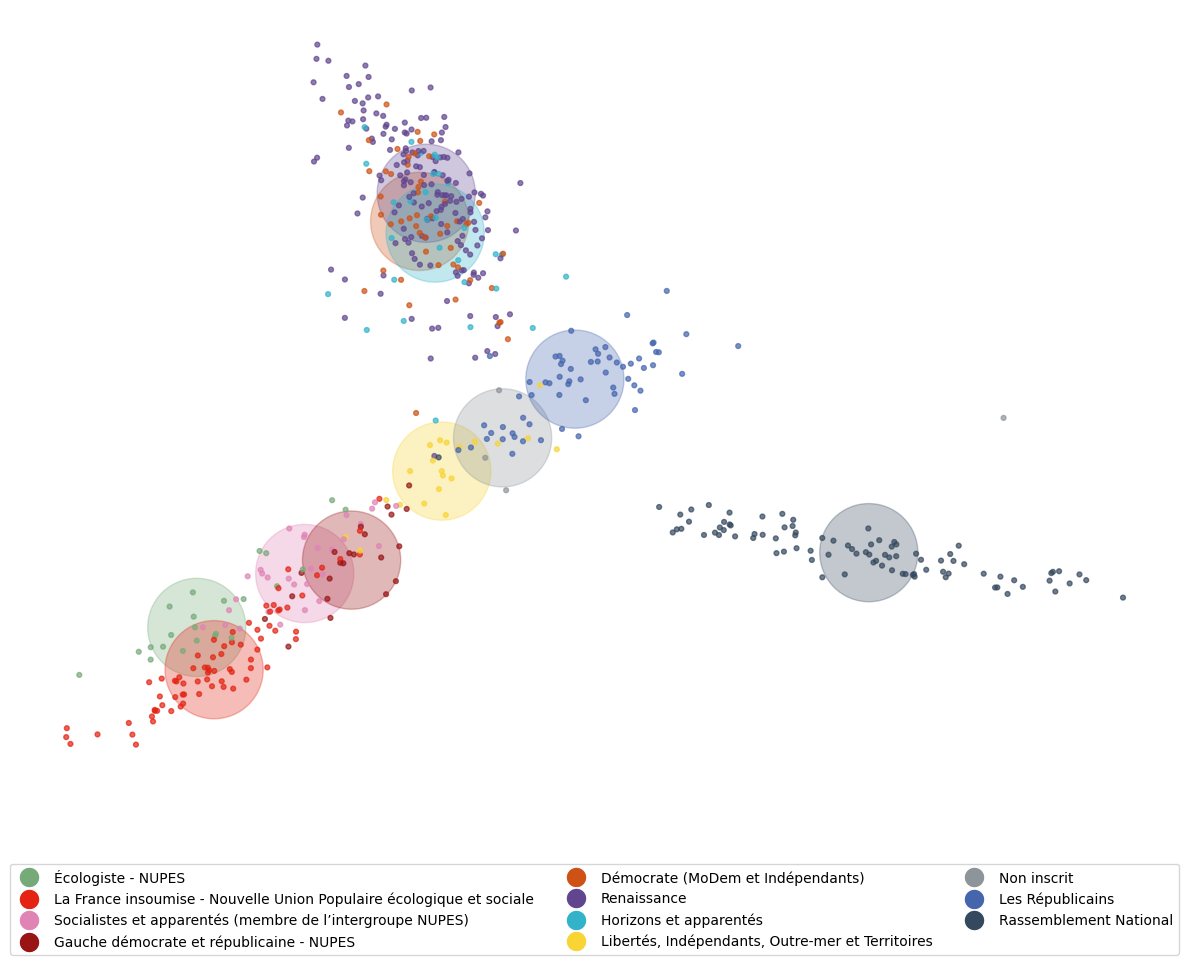

In [16]:
fig, ax = plt.subplots()

(
    axe
    .join(organes.set_index('uid'))
    .plot
    .scatter(
        x="axe 2",
        y="axe 1",
        c="couleurAssociee",
        alpha=0.3,
        s=5000,
        ax=ax,
    )
)

(
    mapping
    .plot
    .scatter(
        x="axe 2",
        y="axe 1",
        s=12,
        #a="loyaute",
        alpha= 0.7, #1-loyautes.loyaute.fillna(0),
        c="couleurAssociee",
        figsize=(15,10),
        ax=ax
    )
)

plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', label=org['libelle'], markerfacecolor=org['couleurAssociee'], markersize=15)
        for org in axe.join(organes.set_index('uid')).to_records()
    ],
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=3
)

ax.axis('off')

plt.savefig('graphics/acteurs_pca_scrutins.png', bbox_inches='tight')

plt.show()

In [24]:
dagstermill.yield_event(AssetMaterialization(asset_key="pca_votes_plotted"))

AssetMaterialization(asset_key=AssetKey(['pca_votes_plotted']), description=None, metadata={}, partition=None, tags=None)

In [17]:
axe.join(organes.set_index('uid'))

,axe 1,axe 2,@xmlns,@xmlns:xsi,@xsi:type,codeType,libelle,libelleEdition,libelleAbrege,libelleAbrev,...,regime,legislature,regimeJuridique,siteInternet,nombreReunionsAnnuelles,secretariat,listePays,positionPolitique,preseance,couleurAssociee
organe,,,,,,,,,,,,,,,,,,,,,
PO800526,-15.940413,-9.220727,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Écologiste - NUPES,du groupe Écologiste - NUPES,Ecolo - NUPES,ECOLO,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,8.0,#77AA79
PO800490,-18.870966,-8.625866,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,La France insoumise - Nouvelle Union Populaire...,du groupe La France insoumise - Nouvelle Union...,LFI - NUPES,LFI-NUPES,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,3.0,#E42313
PO800496,-12.208452,-5.517531,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Socialistes et apparentés (membre de l’intergr...,du groupe Socialistes et apparentés (membre de...,SOC,SOC,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,6.0,#DF84B5
PO800502,-11.280576,-3.909381,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Gauche démocrate et républicaine - NUPES,du groupe de la Gauche démocrate et républicai...,GDR - NUPES,GDR-NUPES,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,9.0,#991414
PO800484,12.184351,-1.573154,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Démocrate (MoDem et Indépendants),du groupe Démocrate (MoDem et Indépendants),Dem,DEM,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Minoritaire,5.0,#CE5215
PO800538,14.130518,-1.349316,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Renaissance,du groupe Renaissance,RE,RE,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Majoritaire,1.0,#61468F
PO800514,11.375504,-1.042384,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Horizons et apparentés,du groupe Horizons et apparentés,HOR,HOR,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Minoritaire,7.0,#32B3CA
PO800532,-5.112847,-0.817343,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,"Libertés, Indépendants, Outre-mer et Territoires","du groupe Libertés, Indépendants, Outre-mer et...",LIOT,LIOT,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,10.0,#F8D434
PO793087,-2.809973,1.270190,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Non inscrit,des députés non inscrits,NI,NI,...,5ème République,16.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,99.0,#8D949A


In [18]:
groupes = pd.CategoricalDtype(categories=axe.join(organes.set_index('uid')).libelle, ordered=True)
groupes

CategoricalDtype(categories=['Écologiste - NUPES',
                  'La France insoumise - Nouvelle Union Populaire écologique et sociale',
                  'Socialistes et apparentés (membre de l’intergroupe NUPES)',
                  'Gauche démocrate et républicaine - NUPES',
                  'Démocrate (MoDem et Indépendants)', 'Renaissance',
                  'Horizons et apparentés',
                  'Libertés, Indépendants, Outre-mer et Territoires',
                  'Non inscrit', 'Les Républicains', 'Rassemblement National'],
, ordered=True)

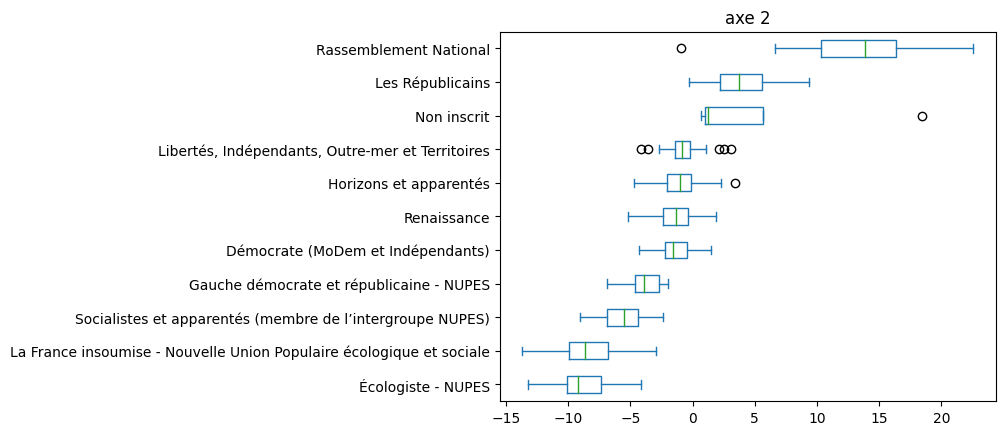

In [19]:
fig, ax = plt.subplots()

(
    mapping
    [['axe 2', 'libelle', 'couleurAssociee']]
    .assign(
        libelle = lambda df: df.libelle.astype(groupes)
    )
    .reset_index(drop=True)
    .plot
    .box(
        by="libelle",
        vert=False,
        ax=ax,
        #xlim=[-20, 20]
    )
)

ax.set_yticklabels(axe.join(organes.set_index('uid')).libelle)

plt.show()

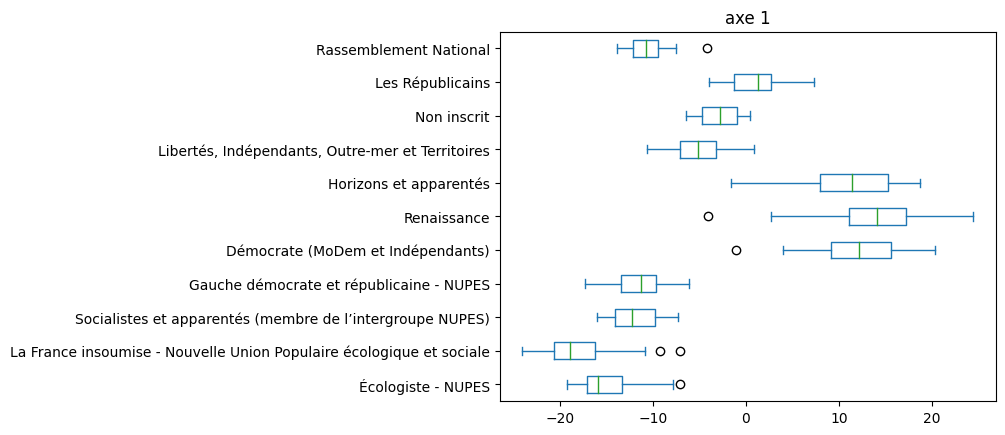

In [20]:
fig, ax = plt.subplots()

(
    mapping
    [['axe 1', 'libelle', 'couleurAssociee']]
    .assign(
        libelle = lambda df: df.libelle.astype(groupes)
    )
    .reset_index(drop=True)
    .plot
    .box(
        by="libelle",
        vert=False,
        ax=ax
    )
)

ax.set_yticklabels(axe.join(organes.set_index('uid')).libelle)

plt.show()